## Регрессия

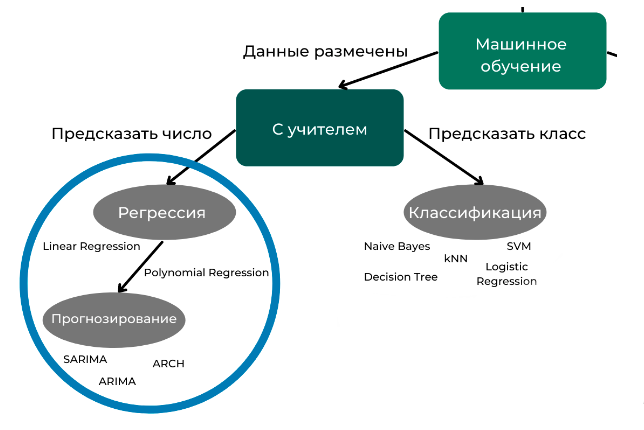

**Задача регрессии** (regression) — предсказание вещественного числа на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является числовым.

**Цель обучения** — построить модель, которая отражала бы зависимость между признаками и целевой числовой переменной.

Классическими методами регрессии являются:
* **линейная (Linear)**;
* **полиномиальная (Polynomial)**

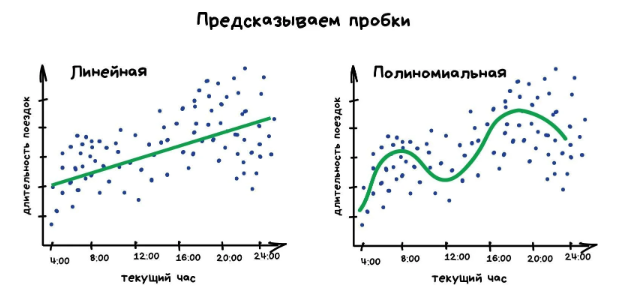

**Математическая постановка** задачи регрессии:

Задано множество объектов $X = \{x_1, x_2, .., x_m\}$ и множество правильных ответов $Y = \{y_1, y_2, .., y_m\}$, где $m$ — размер выборки. Причём множество $Y$ принадлежит множеству действительных чисел, т. е. $Y \in R$, а каждый объект из множества $X$  описывается $n$ признаками: $x_i = [x_{i1}, x_{i2}, .., x_{in}]$.

Множество объектов и множество правильных ответов связаны между собой неизвестной зависимостью, которая записывается как $y = f(x)$ или $y : X \to Y$.

Необходимо найти такой алгоритм (модель) $a$, который воспроизводит неизвестную зависимость: $a = f(x)$ или $a : X \to Y$.

**Прогнозирование (forecasting)** — это задача регрессии, в которой мы пытаемся предсказать будущее поведение временного ряда, то есть целевая переменная является числовой и зависит от времени. Причём каждому моменту времени соответствует одно конкретное значение.

Методы регрессии с небольшими изменениями подходят и для решения задачи прогнозирования. 
Большей эффективностью обладают модели, которые разработаны специально для прогнозирования временных рядов, например:
* ARIMA,
* SARIMA (модификация ARIMA),
* ARCH (модель для финансовых временных рядов).

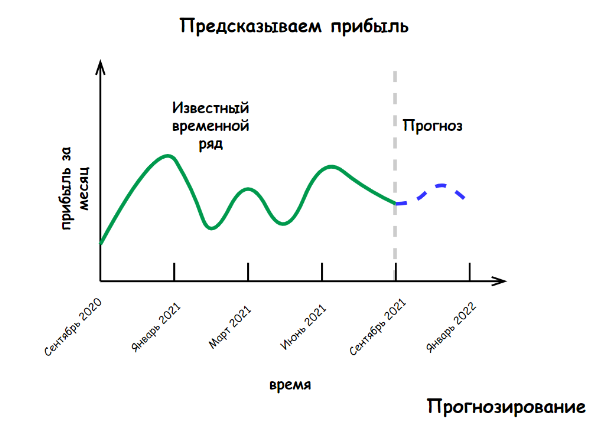

**Линейные модели** — это модели, отображающие зависимость целевого признака от факторов в виде линейной взаимосвязи.

Общий вид модели в случае, когда целевая переменная зависит от  факторов, будет иметь следующий вид:

$\^{y} = w_0 + w_1x_1 + ... + w_mx_m = w_0 + \sum_{y=1}^mw_jx_j$

Двухмерная модель:

Для этого сначала вспомним уравнение прямой из школьного курса математики:

$y = kx + b$

где:

$x$ — это некоторый фактор, от которого зависит целевая переменная $y$. В нашем случае, $x$ — это пористость скважины, а $y$ — добыча газа.
$k$ — коэффициент наклона прямой (тангенс угла наклона). Если $k > 0$, это означает, что угол наклона прямой острый и прямая возрастает. Если $k < 0$, угол наклона тупой и прямая убывает.
$b$ — коэффициент смещения прямой по оси $y$. Он будет соответствовать значению $y$ при $x = 0$. То есть это точка пересечения прямой и оси Y.

k и b - параметры линейной регрессии

 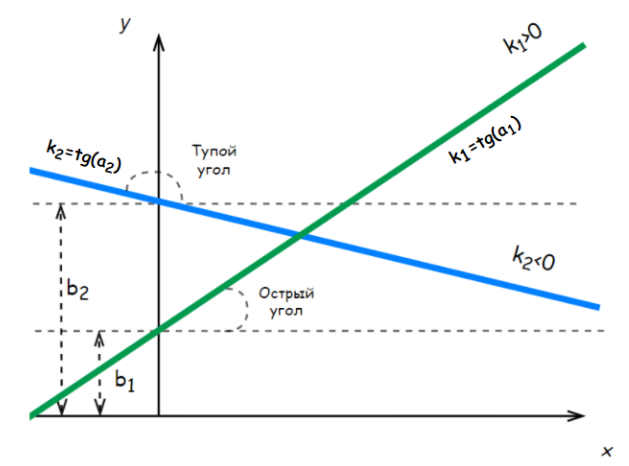



### Поиск параметров линейной регрессии. Метод наименьших квадратов

Поиск параметров производится путём минимизации некоторой функции ошибки.

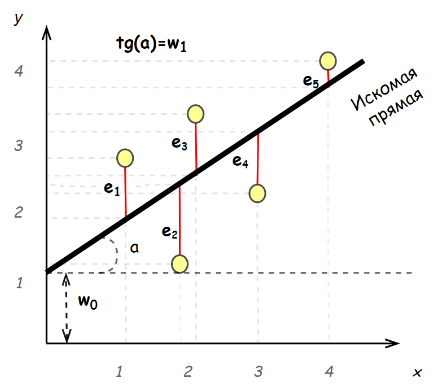

$e_i = |y_i - \^{y_i}|$,  где $y_i$ - результат подстановки i-ого значения x в модель линейной регрессии

Виды метрик:

* **MAE (Mean Absolute Error)**

$MAE = \cfrac{\sum_{i=1}^ne_i}{n} = \cfrac{\sum_{i=1}^n|y_i - \^{y_i}|}{n} = \cfrac{\sum_{i=1}^n|y_i - w_0 - w_1x_i|}{n} \to min_w$ 

* **MSE (Mean Square Error)**

$MSE = \cfrac{\sum_{i=1}^ne_i^2}{n} = \cfrac{\sum_{i=1}^n(y_i - \^{y_i})^2}{n} = \cfrac{\sum_{i=1}^n(y_i - w_0 - w_1x_i)^2}{n} \to min_w$ 

* **MAPE (Mean Absolute Percent Error)**

$MAPE = \cfrac{\sum_{i=1}^ne_i}{|y_i|}* \cfrac{100\%}{n} = \cfrac{\sum_{i=1}^n|y_i - \^{y_i}|}{|y_i|}* \cfrac{100\%}{n} = \cfrac{\sum_{i=1}^n|y_i - w_0 - w_1x_i|}{|y_i|}* \cfrac{100\%}{n} \to min_w$ 

* **RMSE (Root Mean Squared Error)**

$RMSE = \sqrt{MSE} = \sqrt{\cfrac{\sum_{i=1}^ne_i^2}{n}} = \sqrt{\cfrac{\sum_{i=1}^n(y_i - \^{y_i})^2}{n}}$

* **Коэффициент детерминации ($R^2$)**

$R^2 = 1 - \cfrac{MSE}{MSE_{mean}}$, где

$MSE_{mean} = \cfrac{\sum_{i=1}^n(y_i - \~{y})^2}{n}$, где

$\~{y}$ - среднее по вектору правильных ответов

То есть $R^2$ показывает, насколько наша модель лучше, чем если бы все предсказания были средним по правильным ответам.

Есть ещё одна интерпретация данной метрики. Статистически показатель $R^2$ описывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

Удовлетворительным $R^2$ считается показатель выше 0.5: чем ближе к 1, тем лучше. Отрицательные значения $R^2$ говорят о том, что построенная модель настолько плоха, что лучше было бы присвоить всем ответам среднее значение.


|<font color=gray size=2> НАЗВАНИЕ </font>| <font color=gray size=2> ФОРМУЛА </font>| <font color=gray size=2> ИНТЕРПРЕТАЦИЯ И ПРИМЕНЕНИЕ</font>	| <font color=gray size=2> ДОСТОИНСТВА </font>|	<font color=gray size=2> НЕДОСТАТКИ	</font>| <font color=gray size=2> ФУНКЦИЯ В МОДУЛЕ METRICS БИБЛИОТЕКИ SKLEARN </font>|
|--|--|--|--|-----|--|
|MAE| $\cfrac{\sum_{i=1}^n\|y_i - \^{y_i}\|}{n}$ | <font color=gray size=2>Помогает оценить абсолютную ошибку: насколько в среднем число в предсказании разошлось с реальным числом.</font> |	<font color=gray size=2>Удобно интерпретировать. Измеряется в тех же единицах, что и целевой признак. Несильно искажается при наличии выбросов. </font>|	<font color=gray size=2>Не поможет, если необходимо сравнить модели, предсказывающие одно и то же по разным признакам.	</font>| <font color=gray size=2>mean_absolute_error()</font>
 MAPE |  $\cfrac{\sum_{i=1}^n\|y_i - \^{y_i}\|}{\|y_i\|}* \cfrac{100\%}{n}$ | <font color=gray size=2> Помогает абстрагироваться от конкретных чисел и оценить абсолютную ошибку в процентах.	</font>| <font color=gray size=2>Легко интерпретировать. Используется в задачах, где неизвестно, какое значение метрики считать приемлемым.</font>| <font color=gray size=2>Плохо подходит для задач, в которых важны конкретные единицы измерений. Лучше использовать в паре с MAE, чтобы знать абсолютную ошибку и её значение в процентах.		</font>| <font color=gray size=2>mean_absolute_percentage_error()</font>
MSE	 |  $\cfrac{\sum_{i=1}^n(y_i - \^{y_i})^2}{n}$ | <font color=gray size=2>Интерпретации нет. Используется в задачах, где критически важны большие ошибки, например при предсказании координат полёта.</font> | <font color=gray size=2>Каждая ошибка вносит свой квадратичный штраф, большие расхождения между предсказанием и истиной увеличивают штраф. </font>|	<font color=gray size=2>Измеряется в квадратах единиц, поэтому менее доступна для понимания. Искажается при наличии выбросов. Не поможет, если нужно сравнить модели, предсказывающие одно и то же по разным признакам.	</font>|<font color=gray size=2> mean_square_error()</font>
RMSE |$\sqrt{\cfrac{\sum_{i=1}^ne_i^2}{n}}$| <font color=gray size=2>Можно трактовать как стандартное отклонение предсказаний от истинных ответов. Используется в тех же задачах, что и MSE. </font>| <font color=gray size=2>Имеет те же преимущества, что и MSE, но более удобна для понимания (измеряется в тех же единицах, что и целевая переменная).| <font color=gray size=2>Не поможет, если нужно сравнить модели, предсказывающие одно и то же по разным признакам. </font>|	<font color=gray size=2>Отдельная функция отсутствует, но можно извлечь корень из результата функции mean_square_error()</font>.
$R^2$| $1 - \cfrac{MSE}{MSE_{mean}}$| <font color=gray size=2>Помогает понять, какую долю разнообразия (дисперсии) смогла уловить модель в данных. Позволяет сравнить, насколько модель лучше, чем простое предсказание средним.</font> |	<font color=gray size=2>Можно сравнивать модели, обученные на разных признаках. Легко оценить качество модели: измеряется от -∞ до 1. Удовлетворительным показателем считается показатель выше 0.5.</font> | <font color=gray size=2>Чувствительна к добавлению новых данных. Чувствительна к выбросам, так как основана на MSE.</font> |	<font color=gray size=2>r2_score()</font>|


**Метод наименьших квадратов (МНК) или OLS (Ordinary Least Squares)**

Пусть у нас есть матрица X, в которой по строкам собрано n наблюдений, а по столбцам отложено m факторов — по сути, это обычный, привычный нам DataFrame. К каждому примеру из таблицы X есть ответ y.

$\^{y} = w_0 + w_1x_1 + ... + w_mx_m$

$\~{w} = (w_0, w_1, ..., w_m)$ - вектор параметров (хотим найти наилучшую оценку для вектора)

$\~{x} = (x_0, x_1, ..., x_m)$ - вектор признаков

$\~{w} = (X^TX)^{-1}X^Ty = QX^Ty$

Минусы МНК:
* медленная работа с большим количеством признаков. Обращение матриц больших размеров - трудоёмкий процесс;
* невозможность инкрементального обучения, или обучения в режиме реального времени.

**Градиентный спуск (Gradient descent)** — самый используемый алгоритм минимизации функции потерь. Он применяется почти в каждой модели машинного обучения и является наиболее простым в реализации из всех методов численной оптимизации.

В двумерном случае, когда есть только один параметр, от которого зависит функция потерь, можно построить график функции потерь. Например, для MSE, зависящей от одного параметра, график будет иметь вид параболы:

**Математически градиент** — это вектор, который состоит из частных производных по параметрам функции.

$\nabla L(w) = (\cfrac{\partial L(w)}{\partial w_0}, \cfrac{\partial L(w)}{\partial w_1}, ..., \cfrac{\partial L(w)}{\partial w_m})$, где

$L(w)$ - функция потерь, $\nabla$ - символ градиента

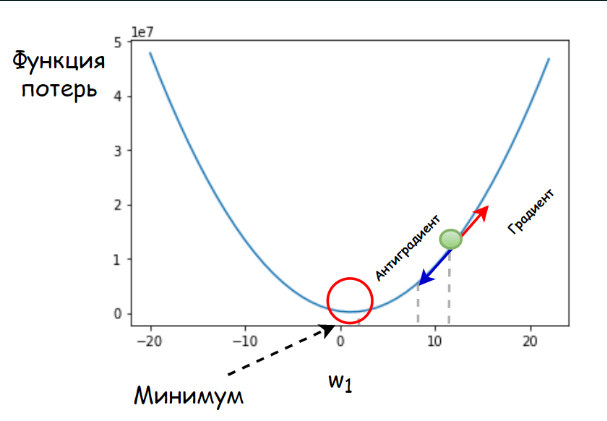

$w^{(k+1)} = w^{(k)} - \eta \nabla L(w^{(k)})$, где

$w$ - это вектор параметров модели, координаты в пространстве, а индекс в круглых скобках сверху означает номер точки в пространстве. Запись $\nabla L(w^{(k)})$ означает, что градиент вычисляется в текущей точке под номером $k$.

$\eta$ - поправочный коэффициент, который носит название **темп обучения (learning rate)**.

**Темп обучения** — это основной параметр алгоритма. Он определяет то, насколько сильно мы будем двигать точку. В аналогии с нашим примером с движением по холмам можно сказать, что это коэффициент, обратный сопротивлению ландшафта, по которому мы движемся.

Управляя данным параметром (уменьшая и увеличивая $\eta$), мы управляем скоростью движения к точке минимума. Чем больше темп обучения, тем длиннее наши шаги и тем быстрее мы движемся, и наоборот. 

Темп обучения является примером внешнего параметра алгоритма, которым может управлять пользователь. Такие параметры ещё называют **гиперпараметрами**.

Есть ещё одно важное свойство градиента: теоретически в точке минимума длина вектора равна 0, то есть движения не происходит. Это свойство мы можем использовать в качестве критерия остановки нашего алгоритма.

Алгоритм градиентного спуска: 
1. Проинициализировать значения параметров.\
    На аналогии наших холмов это будет означать выбор начальной точки в пространстве, из которой мы будем двигаться.\
    Правильная инициализация параметров — это отдельная история. Например, можно инициализировать все параметры нулями или случайными значениями.
2. Повторять до тех пор, пока длина градиента не приблизится к 0. \
    На практике полного равенства градиента нулю достичь невозможно из-за численных вычислений, поэтому в качестве остановки задают минимальную границу, ниже которой длина градиента считается достаточной, чтобы остановиться (например, 0.1, 0.01 или 0.001). Если длина будет меньше заданной, то алгоритм можно останавливать. \
    Существуют и другие критерии остановки: например, остановиться, если текущее значение функции потерь < 1.5. Но они используются гораздо реже.
    1. Вычислить градиент функции потерь.\
        Это будет означать нахождение направления и вектора скорости роста нашего ландшафта. \
        Грубо говоря, нужно взять вектор-столбец с примерами  и подставить его в формулу для вычисления градиента функции потерь. Формулы вычисления градиента для наиболее часто используемых функций потерь уже вычислены и заложены в библиотечные реализации.
    2. Обновить параметры модели, сдвинув их в сторону антиградиента. \
        Из текущей точки необходимо перейти в новую точку, в сторону убывания высоты ландшафта.

Главное требование к функции потерь — это её гладкость во всех точках.

**Гладкими** называются функции, которые имеют производную во всех точках.

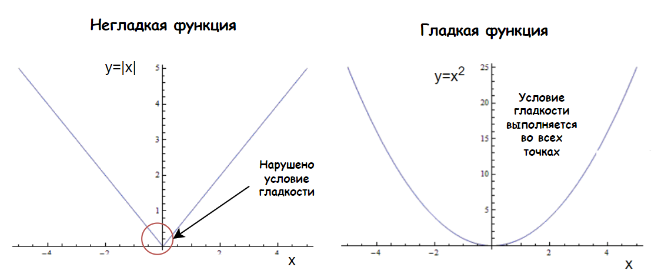

Благодаря своей простоте алгоритм обладает минимальной вычислительной сложностью и работает быстрее, чем метод наименьших квадратов, даже на огромных наборах данных с тысячами признаков.

Однако у градиентного спуска есть одна большая проблема — это сходимость алгоритма к точке истинного минимума. Алгоритм может попросту не сойтись к истинному минимуму.

Сходимость зависит от многих факторов, главные из которых:
* сложности зависимости и сложности функции потерь;
* выбранный темп обучения;
* выбранная начальная точка (инициализация параметров);
* масштабирование признаков.

Из-за сложной зависимости и сложности самой функции потерь она может иметь несколько видов минимумов:
* **Локальный минимум** — это минимум на какой-то локальной области;
* **Глобальный минимум** — это минимум на всей области определения функции (на всём ландшафте).

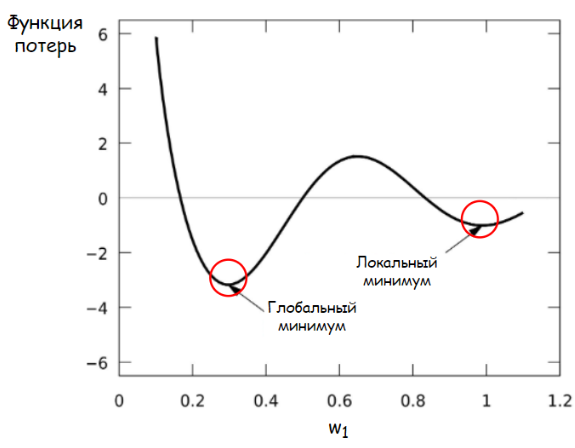

Проблема градиентного спуска заключается в том, что алгоритм может «застрять» в локальном минимуме и не выйти из него.

Чтобы частично решить эту проблему используется не классический градиентный спуск, а его модификации. Например, **стохастический градиентный спуск (Stochastic Gradient Descent, SGD)**. 

В классическом алгоритме мы используем всю выборку и прогоняем её несколько раз через алгоритм, вычисляя градиент функции ошибки, плавно приближаясь к минимуму.

Стохастическая модификация предполагает, что один шаг градиентного спуска производится на основе градиента, рассчитанного не по всей выборке, а только по случайно выбранной части.

То есть мы случайно выбираем несколько строк из таблицы и подставляем их в алгоритм, делаем шаг в сторону минимума и повторяем это множество раз, пока алгоритм не сойдётся к приемлемому значению или пока не закончатся итерации (в реализации всегда задаётся максимум итераций на случай, если алгоритм не сойдётся и будет «блуждать по холмам» вечно).

Благодаря этому вектор градиента всё время колеблется, и мы прыгаем из точки в точку, а не идём вдоль ровной линии, как это было в классическом градиентом спуске.

Однако из-за таких скачков есть шанс пропустить и глобальный минимум функции потерь, если скачки будут слишком большими.

Чтобы управлять шагами, как раз и существует параметр темпа обучения. Он позволяет управлять размером шага градиентного спуска.

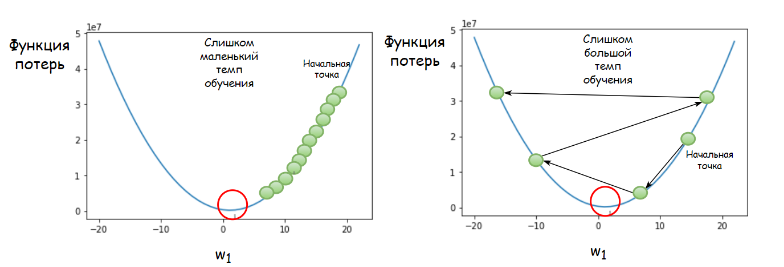

Наиболее распространённые значения $\eta$:  0.01, 0.001 и т. д.

В реализации стохастического градиентного спуска в sklearn берется большой шаг в начале обучения и уменьшается, приближаясь к минимуму, чтобы не «выпрыгнуть» из точки минимума:

$\eta_t = \cfrac{\eta_0}{t_p}$

где $n_0$ — начальное значение темпа обучения, $p$ — мощность уменьшения темпа (задаётся пользователем).

Обязательно масштабирование факторов.


**sklearn.linear_model.SGDRegressor** - метод градиентного спуска:
* **random_state** - число, на основе которого происходит генерация  случайных чисел; 
* **loss** — функция потерь. По умолчанию используется squared_loss (MSE). Есть и другие: например, "huber" - функция потерь Хьюбера. Эта функция менее чувствительна к наличию выбросов, чем MSE;
* **max_iter** — максимальное количество итераций, выделенное на сходимость. Значение по умолчанию — 1000.
* **learning_rate** — режим управления темпом обучения. Значение по умолчанию — 'invscaling'. Этот режим уменьшает темп обучения по формуле $\eta_t = \cfrac{\eta_0}{t_p}$.
Если вы не хотите, чтобы темп обучения менялся на протяжении всего обучения, то можете выставить значение параметра на "constant".
* **$\eta_0$** — начальное значение темпа обучения. Значение по умолчанию — 0.01.
Если параметр learning_rate="constant", то значение этого параметра будет темпом обучения на протяжении всех итераций.
* **power_t** — значение мощности уменьшения p в формуле $\eta_t = \cfrac{\eta_0}{t_p}$. Значение по умолчанию — 0.25.

Сравнение **LinearRegression** (аналитическое решение через метод наименьших квадратов) и **SGDRegressor** (численное решение через стохастический градиентный спуск)

Показатель сравнения/Наименование в sklearn	| LinearRegression	| SGDRegressor
--|--|--
Метод решения и его сходимость к истинному минимуму	| Аналитический — метод наименьших квадратов. Это главное преимущество метода: есть формула => подставили значения => совершили вычисления. Аналитический метод по определению является сходящимся, так как опирается на условие минимума функции. | Численный — метод стохастического градиентного спуска. Поиск минимума осуществляется итерациями. Сходимость зависит от множества факторов: темпа обучения, характера функции потерь, критерия остановки.
Функция потерь	| Средний квадрат ошибки (MSE) | Любая гладкая функция, главное — чтобы она была дифференцируемой во всех точках. Функции потерь, доступные в sklearn, можно увидеть [здесь](https://scikit-learn.ru/1-5-stochastic-gradient-descent/#mathematical-formulation). Каждая функция потерь предназначена для конкретной задачи.
Сложность алгоритма и время обучения | Кубическая сложность из-за вычисления обратной матрицы. Время обучения кубически возрастает, что критически сказывается на наборах данных с большим количеством признаков. | Линейная сложность, простые математические операции умножения и сложения. Время обучения линейно возрастает с количеством признаков.
Возможность дообучения по новым данным	| Отсутствует. Все данные должны быть поданы в модель заранее. Новый вызов fit() приведёт к новой настройке параметров. | Есть возможность дообучить модель на новых данных в режиме реального времени (инкрементальное обучение). Повторный вызов fit() уточняет уже существующие параметры модели.
Чувствительность к разному масштабу факторов | Низкая, стандартизация (нормализация) факторов желательна только на большом количестве признаков в данных. | Обязательная стандартизация (нормализация) факторов при наличии разных масштабов из-за особенностей сходимости.
Подбор внешних параметров | Внешних параметров нет. | Для поисков лучшего решения, возможно, придётся подбирать параметры: начальный темп обучения, режим обучения и т. д. Правильную реализацию подбора параметров мы обсудим в отдельном модуле.

По приведённой таблице можно выделить примерные области применения каждого из методов:
* Если стоит задача одноразового обучения на всех данных, которые есть, и признаков немного (меньше 1 000), наш выбор — LinearRegression, так как МНК обеспечивает простое решение и гарантированную сходимость.
* Если стоит задача непрерывного обучения модели в процессе её эксплуатации или количество признаков очень велико, наш выбор — SGDRegressor с возможностью корректировки параметров на новых данных.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

In [4]:
from sklearn.datasets import load_boston 
boston = load_boston()

* **CRIM** — уровень преступности на душу населения по городам.;
* **ZN** — доля земли под жилую застройку, разделённая на участки площадью более 25 000 кв. футов;
* **INDUS** — доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город;
* **CHAS** —фиктивная переменная реки Чарльз (1 — если участок прилегает к реке; 0 — в противном случае);
* **NOX** —концентрация оксидов азота (в десятимиллионных долях);
* **RM** —среднее количество комнат в доме;
* **AGE** —доля зданий, построенных до 1940 г. и занимаемых владельцами;
* **DIS** — взвешенные расстояния до пяти бостонских центров занятости;
* **RAD** — индекс доступности радиальных автомобильных дорог;
* **TAX** — полная ставка налога на имущество за каждые 10 000 долларов стоимости;
* **PTRATIO** — соотношение учеников и учителей по городам;
* **B** — 1000 (Bk — 0.63) , где Bk — доля граждан афроамериканского происхождения по городам;
* **LSTAT** — процент населения с низким статусом;
* **MEDV** — медианное значение стоимости домов, занимаемых владельцами, в тысячах долларов США (целевой признак).

In [5]:
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


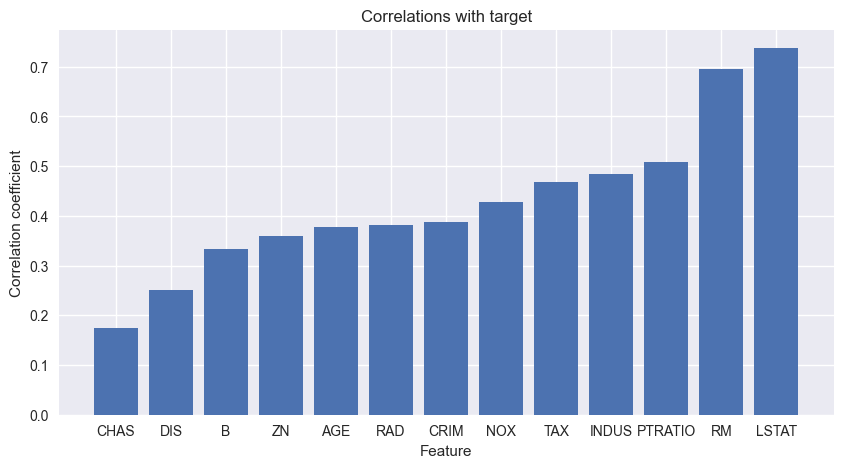

In [7]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Cамый коррелированный по модулю с медианной ценой (MEDV) признак — процент населения с низким статусом (LSTAT). Давайте построим линейную регрессию, используя этот признак.

In [8]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


Рассчитаем вручную сначала

Для вычисления свободного члена $w_0$ необходимо добавить в таблицу столбец, полностью состоящий из единиц.

In [9]:
def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

In [10]:
#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


$\^{y} = 34.55 - 0.95x_1$

Коэффициент $w_0 = 34.55$ имитирует влияние сторонних факторов, которые не учтены в модели. Это значение медианной цены домов на участке, если бы значение процента населения с низким статусом было равно 0. 

Коэффициент  $w_0 = - 0.95$ означает, на сколько в среднем изменится медианная цена (в тысячах долларов) при увеличении низкостатусного населения на 1 единицу. То есть если количество низкостатусного населения увеличится на 1 %, то медианная цена зданий на участке упадёт на 0.95 тысяч долларов. Можно сказать, что каждый новый процент низкостатусного населения уменьшает медианную цену на 0.95 тысяч долларов.

Теперь, если в данных появится новый участок Бостона с известной долей низкостатусного населения, мы сможем предсказать значение медианной стоимости домов простой подстановкой значений в модель:

In [11]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда

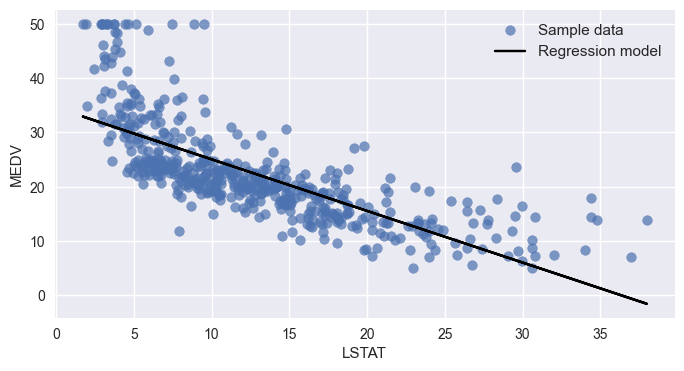

In [12]:
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Теперь воспользуемся sklearn

In [13]:
from sklearn import linear_model

In [14]:
#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: 34.5538408793831
w1: [-0.95004935]


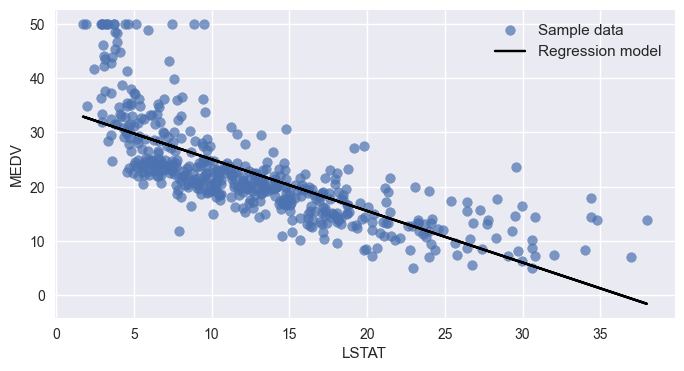

In [15]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

Построим линейную регрессию на всех признаках

In [17]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y);

In [18]:
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})
#Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Мы построили две модели линейной регрессии: lr_lstat на одном признаке (LSTAT) и lr_full — на всех признаках в данных. Хотелось бы сравнить эти модели по их качеству.

Визуализируем ошибки

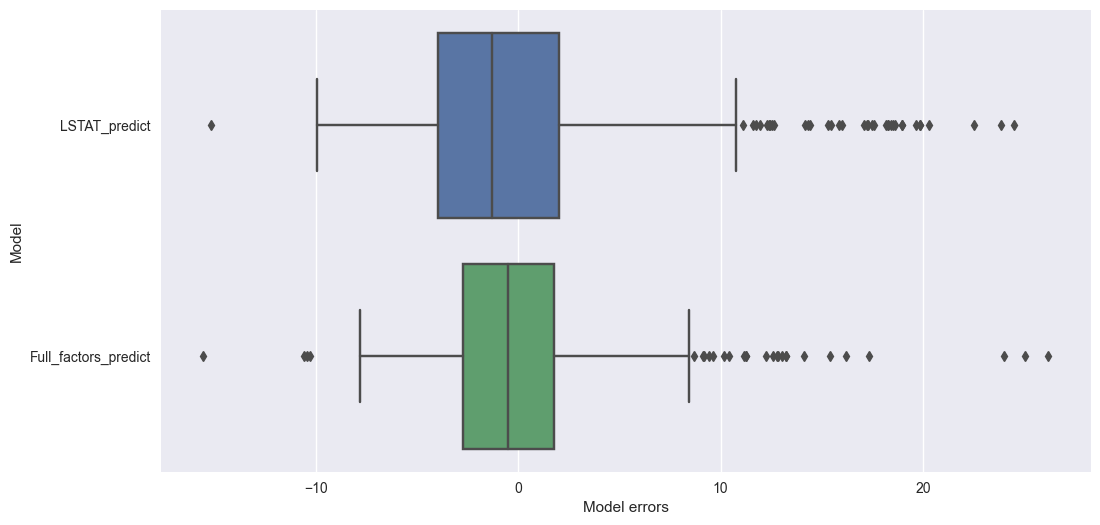

In [19]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Из построенных диаграмм ошибок видно, что разброс ошибок для модели, построенной на всех признаках, ниже (ящик уже и усы короче), и медиана ошибки также более приближена к 0. То есть можно сказать, что визуально качество второй модели выглядит лучше.

На обеих диаграммах присутствуют точки, сильно выбивающиеся за пределы усов. Это наблюдения, для которых модель допустила очень большую ошибку, по сравнению с основной группой.

Можно предположить, что это объекты, для которых гипотеза о линейной зависимости несправедлива, и линейной модели не хватает для предсказания целевой переменной для таких объектов. 

Рассчитаем метрики

In [21]:
from sklearn import metrics

#Делаем предсказание по 1 признаку
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_lstat)))

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544


In [22]:
#Делаем предсказание по всем признакам
y_predict_full = lr_full.predict(boston_data[features])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_full) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741


По всем метрикам вторая модель, построенная на основе всех признаков в данных, превосходит первую.

Используем метод градиентного спуска

In [26]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов

#Создаём объект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

print('w0: {}'.format(sgd_lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [34.33010969]
w1: [-0.96193242]


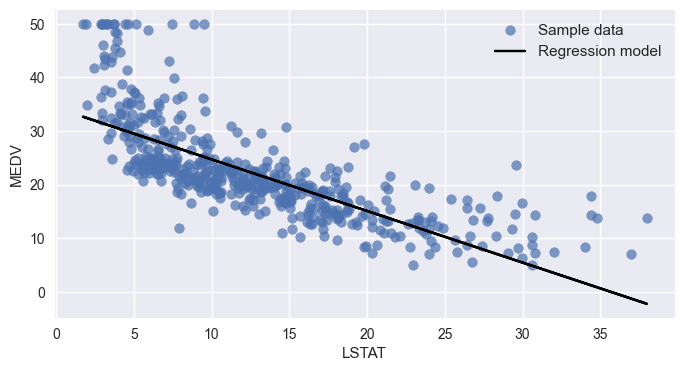

In [27]:
#функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [28]:
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.542


Теперь построим на всех признаках

In [29]:
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
 
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


In [30]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -10590303862129979358707712.000


Отрицательный $R^2$ говорит о том, что модель абсолютно не описывает зависимости в данных.

При использовании градиентного спуска и его модификаций очень важно масштабировать данные с помощью нормализации или стандартизации. Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.

In [31]:
from sklearn import preprocessing
 
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
X_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [32]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [33]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.740


Давайте посмотрим, что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1

In [34]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -335415038359.635


SGD разошёлся из-за слишком высокого темпа обучения. 

Что будет, если поставить слишком маленькое значение параметра

In [35]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=1e-6, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1.578


Снова $R^2<0$, но также мы видим предупреждение, которое говорит о том, что алгоритму не хватило количества итераций (max_iter), чтобы добраться до минимума. То есть SGD не дошёл до точки минимума из-за слишком низкого темпа обучения.

### Смещение и разброс

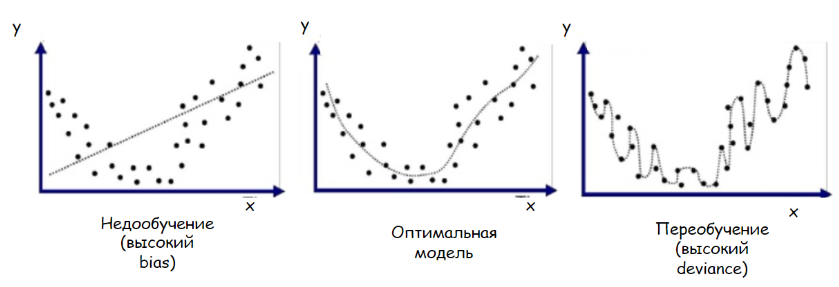

* На первом рисунке изображена простая модель линейной регрессии, не способная уловить сложную зависимость в данных.
* На втором рисунке изображена оптимальная модель, которая хорошо описывает зависимость и при этом не имеет переобучения (полином четвёртой степени).
* На последнем рисунке изображен полином 27-й степени, который подстроился под каждую точку в тренировочном наборе, но не смог уловить общие закономерности.

**Смещение (bias)** — это математическое ожидание разности между истинным ответом и ответом, выданным моделью. То есть это ожидаемая ошибка модели:

$bias(\^{y}) = M[({y-\^{y}})]$

Чем больше смещение, тем слабее модель. Если модель слабая, она не в состоянии выучить закономерность. Таким образом, налицо недообучение модели.

**Разброс (variance)** — это вариативность ошибки, то, насколько ошибка будет отличаться, если обучать модель на разных наборах данных. Математически это дисперсия (разброс) ответов модели:

$variance(\^{y}) = D[({y-\^{y}})]$

Чем больше разброс, тем больше ошибка будет колебаться на разных наборах данных. Наличие высокого разброса и есть свидетельство переобучения: модель подстроилась под конкретный набор данных и даёт высокий разброс ответов на разных данных.

Теоретически на составляющие смещения и разброса модели можно разложить любую функцию потерь. Например, разложение квадратичной ошибки (её математическое ожидание) будет выглядеть следующим образом:

$M[({y-\^{y}})] = bias(\^{y})^2 + variance(\^{y}) + \sigma^2$, где

* $\sigma^2$ — неустранимая ошибка, вызванная случайностью.
* $bias(\^{y})^2$ — смещение модели (в квадрате).
* $variance(\^{y})$ — разброс модели.

В идеале мы должны свести первые 2 слагаемых к 0. Однако уменьшение одного слагаемого повлечёт увеличение другого. На практике часто приходится балансировать между смещёнными и нестабильными оценками.

Дилемма смещения-дисперсии является центральной проблемой в обучении с учителем. В идеале мы хотим построить модель, которая точно описывает зависимости в тренировочных данных и хорошо работает на неизвестных данных. К сожалению, обычно это невозможно сделать одновременно.

Усложняя модель, мы пытаемся уменьшить смещение (bias), однако появляется риск получить переобучение, то есть мы повышаем разброс (variance). 

С другой стороны, снизить разброс (variance) позволяют более простые модели, не склонные к переобучению, но есть риск, что простая модель не уловит зависимостей и окажется недообученной, то есть мы повышаем смещение (bias).

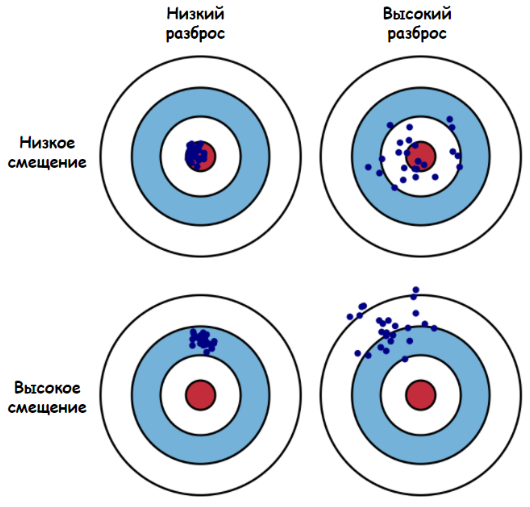

У линейной регрессии, обученной с помощью МНК, меньше всего риск переобучения. 

Разделение данных на две части: обучающий и тестовый наборы

In [40]:
from sklearn.datasets import load_boston 

boston = load_boston()
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
 
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

In [41]:
from sklearn.model_selection import train_test_split
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


In [42]:
#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
#Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)
 
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict)))

Train R^2: 0.743
Test R^2: 0.722


### Полиномиальная регрессия

**Полиномиальная регрессия (Polynomial Regression)** — это более сложная модель, чем линейная регрессия. Вместо уравнения прямой используется уравнение полинома (многочлена). Степень полинома может быть сколь угодно большой: чем больше степень, тем сложнее модель.

В простом двумерном случае, когда мы рассматриваем зависимость целевого признака от одного фактора, полиномом второй степени будет уравнение параболы:

$\^{y} = w_0 + w_1x + w_2x^2$

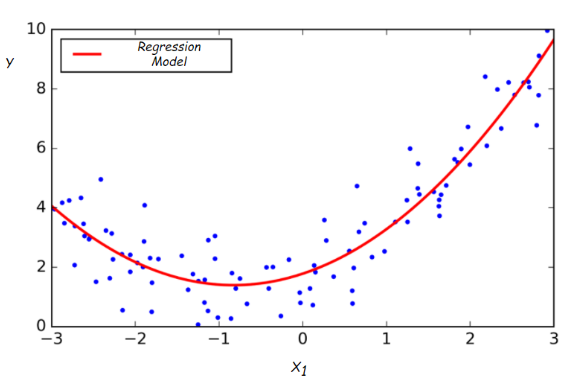

Cтепени  можно тоже считать своего рода искусственными признаками в данных. Они называются **полиномиальными признаками**.

Благодаря степенным слагаемым модель становится сложнее и начинает улавливать более сложные зависимости и выдавать меньшее смещение. Но резко повышается риск переобучения модели — увеличивается разброс предсказаний на разных данных из-за количества факторов.

**preprocessing.PolynomialFeatures** - генерация полиномиальных признаков:
* **degree** — степень полинома. По умолчанию используется степень 2;
* **include_bias** — включать ли в результирующую таблицу столбец из единиц (x в степени 0). По умолчанию стоит True, но лучше выставить его в значение False, так как столбец из единиц и так добавляется в методе наименьших квадратов.

In [43]:
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)


In [46]:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)
 
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.929
Test R^2: 0.268


Переобучение. Из-за своей сложности (количества факторов) модель полностью адаптировалась под тренировочные данные, но взамен получила высокий разброс в показателях на данных, которые она не видела ранее. 

### Регуляризация

**Регуляризация** — способ уменьшения переобучения моделей машинного обучения.

Идея регуляризации состоит в том, что мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс. Мы можем «наказывать» модель за обучение сложным взаимосвязям. 

Математически это будет очень простая операция — добавление к функции потерь некоторого штрафа.

**Штраф** — это дополнительное неотрицательное слагаемое в выражении для функции потерь, которое специально повышает ошибку.  За счёт этого слагаемого метод оптимизации (OLS или SGD) будет находить не истинный минимум функции потерь, а псевдоминимум.

Есть несколько способов добавления штрафа к функции потерь:
* **L1-регуляризация (Lasso)** — добавление к функции потерь суммы модулей коэффициентов, умноженных на коэффициент регуляризации $\alpha$:

$L_1(w) = MSE + \alpha \sum_{j=1}^m|w_j|$

* **L2-регуляризация (Ridge)**, или регуляризация Тихонова — добавление к функции потерь суммы квадратов коэффициентов, умноженных на коэффициент регуляризации $\alpha$:

$L_2(w) = MSE + \alpha \sum_{j=1}^m(w_j)^2$

**Коэффициенты $\alpha$** — это коэффициенты регуляризации. Они отвечают за то, насколько сильное смещение мы будем вносить в модель: чем оно больше, тем сильнее будет штраф за переобучение.

Рассмотрим, как будет выглядеть минимум функции потерь в трёхмерном пространстве (вид сверху). Первый метод, $L_1(w)$, заставляет искать минимум функции потерь на пересечении его с ромбом, а второй, $L_2(w)$, — с окружностью. 

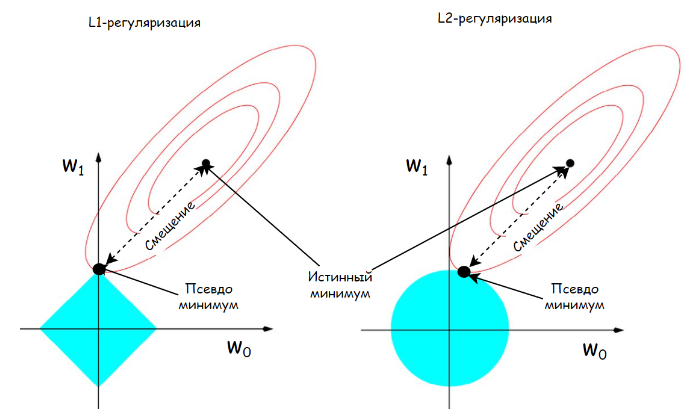

В реализации sklearn для решения задачи оптимизации используется итеративный алгоритм координатного спуска (аналог градиентного спуска, но не использующий производную).

Отличительной особенностью L1-регуляризации является то, что коэффициенты, которые соответствуют «ненужным», по мнению модели, факторам, обнуляются, то есть факторы просто не будут участвовать в предсказании. Это очень важно для сложных моделей, в обучении которых используются множество факторов.

На практике никогда не ясно, какой из методов регуляризации сработает лучше всего. Выход — пробовать оба метода и сравнивать результаты.

Стандартизацию (нормализацию) полезнее проводить перед генерацией полиномиальных признаков, иначе можно потерять масштаб полиномов.

In [47]:
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)
#Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)
#Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)
 
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц
 
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(354, 104)
(152, 104)


In [48]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.879
Test R^2: 0.882


In [49]:
print(np.round(lasso_lr_poly.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


Большая часть коэффициентов обнулилась. Это значит, что признаки, которые соответствуют этим коэффициентам, не используются в прогнозе модели Lasso-регрессии.

In [50]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=10)
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.907
Test R^2: 0.848


In [51]:
print(np.round(ridge_lr_poly.coef_, 3))

[ 0.128 -0.049  0.084  0.117 -0.932  2.848 -1.008 -1.464  0.909 -0.908
 -0.653  0.971 -2.605  0.085 -0.032  0.466  2.721 -0.507  0.986  0.309
 -0.391 -0.714  0.376 -0.379  0.072  0.287  0.143 -0.138 -0.014  0.315
  0.05  -0.409 -0.316  0.075  0.702  0.08  -0.281 -0.37   0.511  0.175
  0.72   0.282  0.477  0.888 -0.012  0.074 -0.052  0.166 -0.263  0.414
 -1.129 -0.852  0.273  0.227 -0.106  0.368 -0.137 -0.241 -0.697 -0.177
 -0.326 -0.524  0.882 -0.637  0.344 -0.439 -0.006  0.386  0.233 -0.535
  0.111 -0.802 -0.662 -0.56   0.22  -1.001  0.123  0.144  0.889 -0.114
 -0.086 -1.022 -0.71   1.08  -0.446 -0.178 -0.07  -0.496  0.874 -0.926
  0.717  0.601 -0.49  -0.723  0.308  1.086 -0.448 -1.256  0.057  0.354
 -0.059 -0.433 -0.791  0.177]


Видно, что L2-регуляризация не обнуляет коэффициенты — она использует для предсказания все признаки.

Давайте организуем процесс перебора параметров модели: создадим цикл, в котором будем перебирать 20 различных значений alpha в диапазоне от 0.001 до 1. 

In [52]:
#Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 20)
#Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    #Обучаем модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    #Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    #Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    #Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

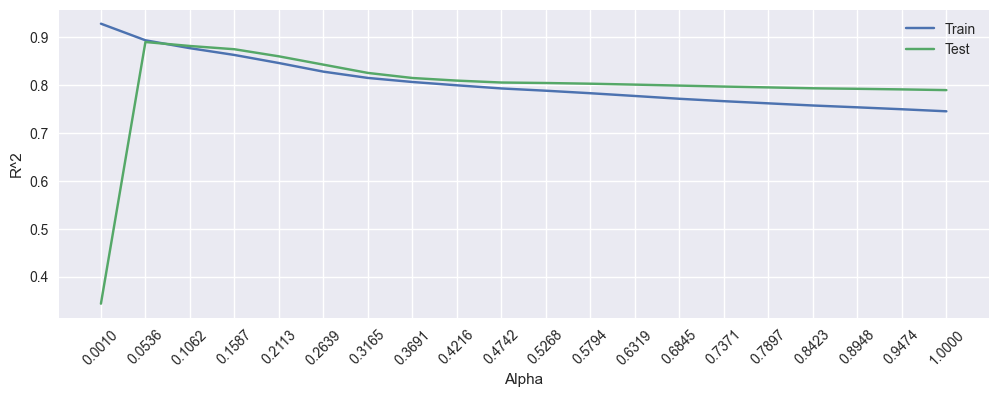

In [53]:
#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

In [54]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.0536)
#Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.894
Test R^2: 0.890


**Эластичная сетка (Elastic Net)** (sklearn.ElasticNet) — это комбинация из двух методов регуляризации. Функция потерь в таком методе выглядит следующим образом:

$L_2(w) = MSE + \alpha \lambda \sum_{j=1}^m|w_j| + \alpha (1 - \lambda) \sum_{j=1}^m(w_j)^2$

Регуляризация присутствует и в модели SGDRegressor, причём она используется по умолчанию